# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import csv
df=pd.DataFrame()

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [18]:
data=pd.read_csv("/Users/msml/Vamsi/SF/MLBasics-master/Data/SalaryData.csv")

In [19]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=1/3, random_state=0)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train, y_train)
y_predic=regression.predict(x_test)


In [22]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [23]:
y_predic

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

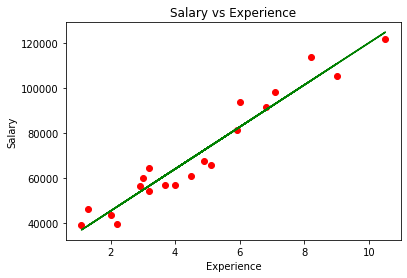

In [24]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regression.predict(x_train), color='green')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

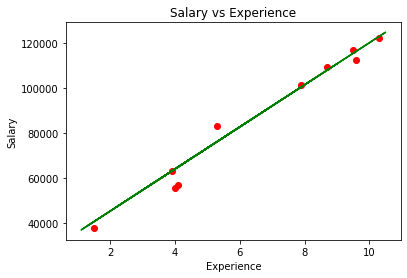

In [25]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regression.predict(x_train), color='green')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [26]:
Sala= pd.Series([])
data=pd.read_csv("/Users/msml/Vamsi/SF/MLBasics-master/Data/SalaryData.csv")
sal=data['Salary']
for i in range(len(data)):
    if data["Salary"][i]<60000:
        #print('1')
        #data.insert(2, "Salary<60000","1")
        #data['Salary<60000']='1'
        Sala[i]="1"
    elif data["Salary"][i]>60000:
        #print('0')
        #data.insert(2, "Salary<60000","0")
        #data['Salary<60000']='0'
        Sala[i]="0"
data.insert(2, "Salary<60000", Sala) 
data

,YearsExperience,Salary,Salary<60000
0,1.1,39343.0,1
1,1.3,46205.0,1
2,1.5,37731.0,1
3,2.0,43525.0,1
4,2.2,39891.0,1
5,2.9,56642.0,1
6,3.0,60150.0,0
7,3.2,54445.0,1
8,3.2,64445.0,0
9,3.7,57189.0,1


In [27]:
x=data.iloc[:, 0:-1].values
y=data.iloc[:, 1:-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

/Users/msml/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/msml/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/msml/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


IndexError: too many indices for array

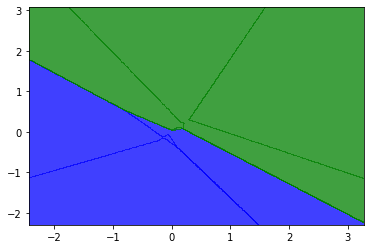

In [31]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() +1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
               c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.